In [2]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [4]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [7]:
train_labels = tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


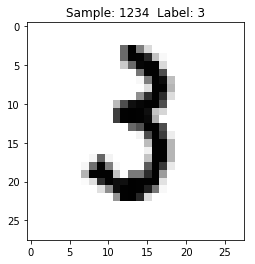

In [8]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Printing the one-hot array of this sample's label 
    print(train_labels[num])  
    #Printing the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

In [9]:
model =Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))

# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation = 'relu',))

#reducing by taking the maximum of each 2x2 block
model.add(MaxPooling2D(pool_size =(2, 2)))

# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())

# a hidden layer to learn with
model.add(Dense(128, activation ='relu'))

# Dropout (preserving from overfitting)
model.add(Dropout(0.5))

#final categorization from 0-9 with Softmax
model.add(Dense(10,activation = 'softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total para

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 66s - loss: 0.1811 - acc: 0.9451 - val_loss: 0.0406 - val_acc: 0.9859
Epoch 2/10
 - 52s - loss: 0.0747 - acc: 0.9783 - val_loss: 0.0350 - val_acc: 0.9883
Epoch 3/10
 - 52s - loss: 0.0562 - acc: 0.9832 - val_loss: 0.0308 - val_acc: 0.9901
Epoch 4/10
 - 52s - loss: 0.0408 - acc: 0.9879 - val_loss: 0.0319 - val_acc: 0.9898
Epoch 5/10
 - 52s - loss: 0.0359 - acc: 0.9887 - val_loss: 0.0348 - val_acc: 0.9899
Epoch 6/10
 - 52s - loss: 0.0291 - acc: 0.9906 - val_loss: 0.0274 - val_acc: 0.9916
Epoch 7/10
 - 52s - loss: 0.0231 - acc: 0.9925 - val_loss: 0.0304 - val_acc: 0.9917
Epoch 8/10
 - 53s - loss: 0.0218 - acc: 0.9930 - val_loss: 0.0382 - val_acc: 0.9903
Epoch 9/10
 - 52s - loss: 0.0191 - acc: 0.9936 - val_loss: 0.0299 - val_acc: 0.9925
Epoch 10/10
 - 52s - loss: 0.0170 - acc: 0.9947 - val_loss: 0.0335 - val_acc: 0.9909


In [14]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03347611008191407
Test accuracy: 0.9909


In [16]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (1, 784)